In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

In [3]:
try:
    # Read the data from CSV file
    df = pd.read_csv('customer_data.csv')
    print("Successfully loaded data from customer_data.csv")

except FileNotFoundError:
    print("CSV file not found. Creating a sample dataset and saving it...")

# Display the first few rows of the dataset
print("\nFirst 5 rows of the student dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

Successfully loaded data from customer_data.csv

First 5 rows of the student dataset:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   56                  84               71.905329   
1           2   69                  86               38.482533   
2           3   46                  41               38.967487   
3           4   32                  23               10.002036   
4           5   60                  76               56.350309   

   Purchase Frequency  Avg Purchase Value  
0                 5.9          106.071893  
1                 6.0           62.755253  
2                 7.5           29.958887  
3                 1.7           67.007220  
4                 2.9           72.704110  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID      

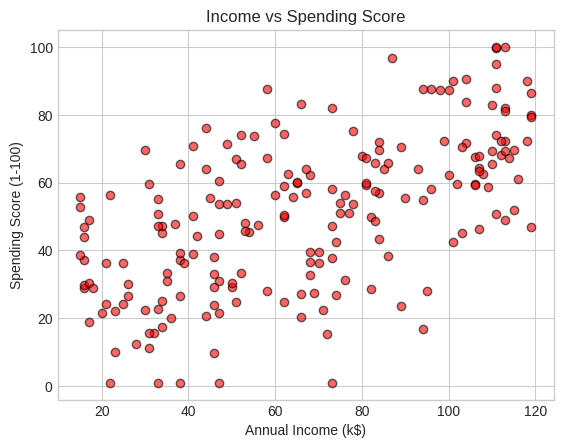

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            alpha=0.6, c='red', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()

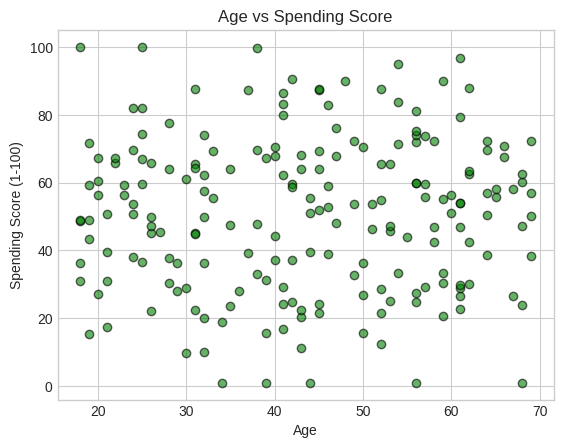

In [5]:
plt.scatter(df['Age'], df['Spending Score (1-100)'],
            alpha=0.6, c='green', edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

In [6]:
numeric_df = df.select_dtypes(include=[np.number]).drop('CustomerID', axis=1) #customerID is not meaningful for corr

# Compute the correlation matrix for numerical variables
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000           -0.045936                0.020348   
Annual Income (k$)     -0.045936            1.000000                0.598042   
Spending Score (1-100)  0.020348            0.598042                1.000000   
Purchase Frequency      0.004427            0.037133                0.420496   
Avg Purchase Value      0.024484            0.367822                0.184898   

                        Purchase Frequency  Avg Purchase Value  
Age                               0.004427            0.024484  
Annual Income (k$)                0.037133            0.367822  
Spending Score (1-100)            0.420496            0.184898  
Purchase Frequency                1.000000           -0.025963  
Avg Purchase Value               -0.025963            1.000000  


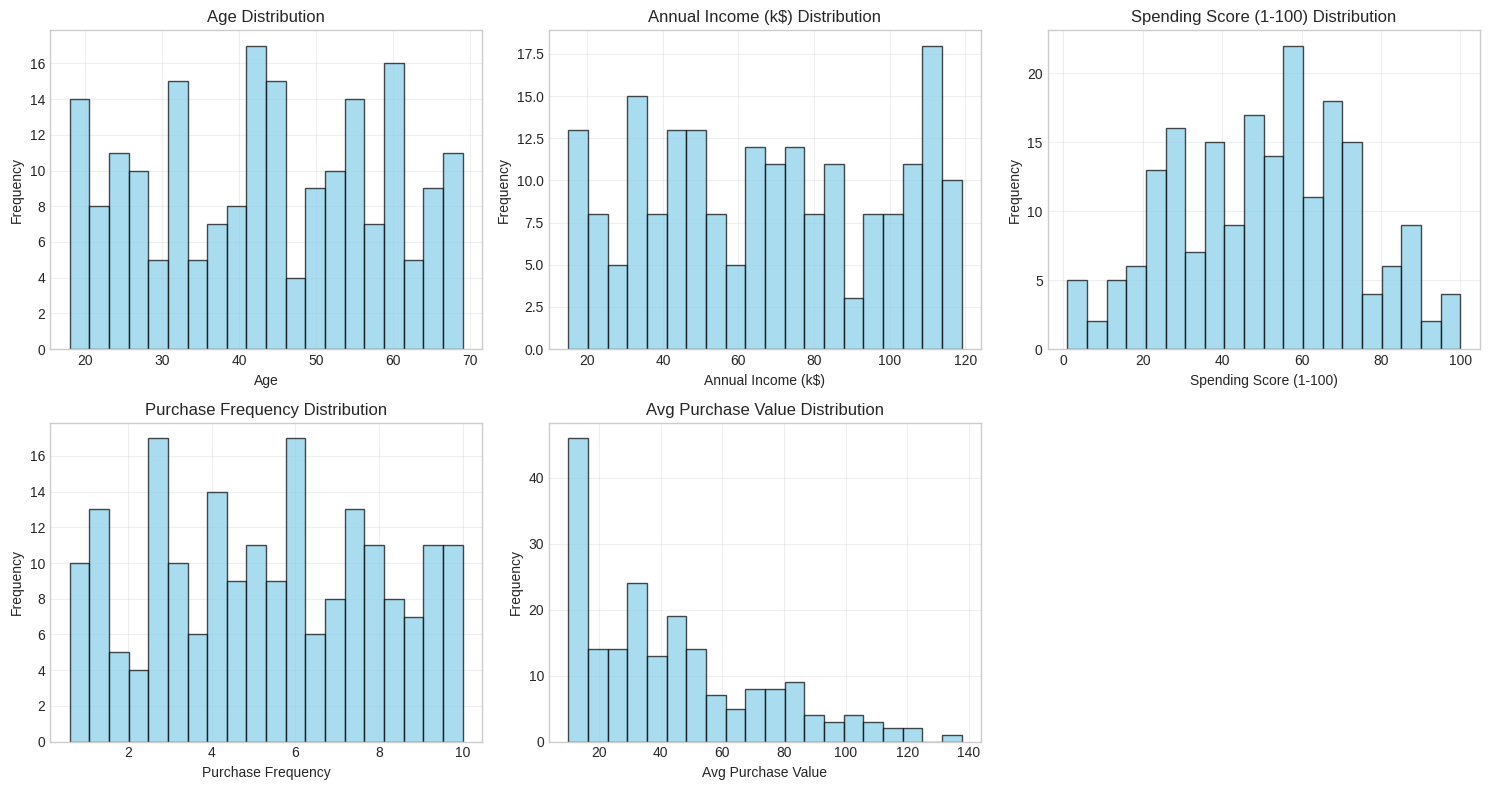

In [7]:
# Get all numeric columns except customerID
numeric_cols = df.select_dtypes(include=[np.number]).drop('CustomerID', axis=1).columns

# Create distribution plots for all variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col} Distribution')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot (you have 5 variables, 6 positions)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [8]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values per Column:
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Avg Purchase Value        0
dtype: int64

Total Missing Values: 0


There are no missing values as found in the summary, as such there is no need to handle the case of missing data.

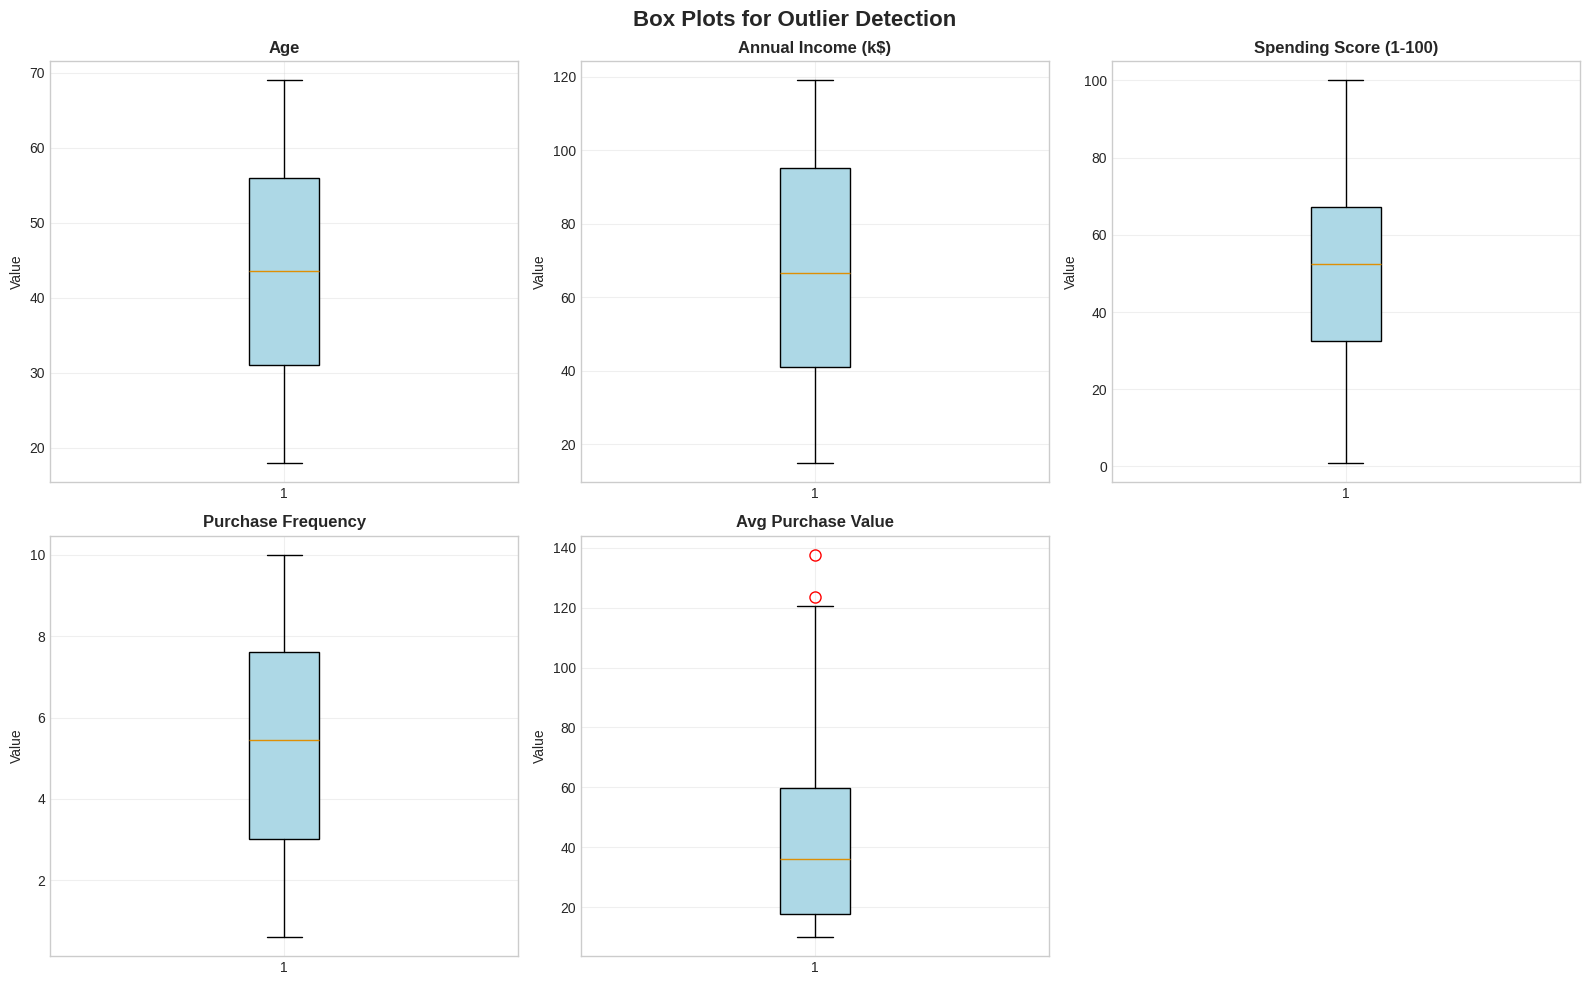

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Create box plot
    bp = axes[i].boxplot(df[col], patch_artist=True)

    # Color the box
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_edgecolor('black')

    # Highlight outliers in red
    bp['fliers'][0].set_markeredgecolor('red')
    bp['fliers'][0].set_markersize(8)

    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Box Plots for Outlier Detection',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

There is no need to remove the outliers present in the Avg Purchase Value box chart. These high spenders who purchase more will likely be useful for the retail company's marketing plans, as they could represent VIP customers, and could be meaningful in exploring such a group/cluster.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

print("\n\nSummary of standardized data: \n")
print(df_standardized[numeric_cols].describe())


print("\n\nFirst 5 values of standardized data: \n")
print(df_standardized.head())



Summary of standardized data: 

                Age  Annual Income (k$)  Spending Score (1-100)  \
count  2.000000e+02        2.000000e+02            2.000000e+02   
mean   1.998401e-16        1.221245e-16            6.661338e-17   
std    1.002509e+00        1.002509e+00            1.002509e+00   
min   -1.705860e+00       -1.672849e+00           -2.215687e+00   
25%   -8.336404e-01       -8.387506e-01           -8.220848e-01   
50%    5.032034e-03       -2.069207e-02            6.589641e-02   
75%    8.437044e-01        9.016288e-01            7.266480e-01   
max    1.715924e+00        1.663546e+00            2.182871e+00   

       Purchase Frequency  Avg Purchase Value  
count        2.000000e+02        2.000000e+02  
mean         1.154632e-16       -7.105427e-17  
std          1.002509e+00        1.002509e+00  
min         -1.766266e+00       -1.131241e+00  
25%         -8.711042e-01       -8.696710e-01  
50%          4.270667e-02       -2.394882e-01  
75%          8.446223e-01 

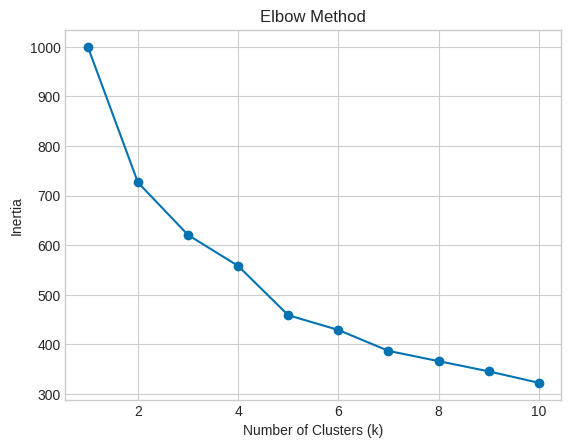

In [11]:
from sklearn.cluster import KMeans

scaled_data = df_standardized[numeric_cols]
inertias = []

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)  # Save inertia

# Plot
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the graph for elbow method, the optimal k value appears to be k=5.

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

best_k = k_range[np.argmax(silhouette_scores)]
print(f"\n✓ Best k = {best_k} (Score: {max(silhouette_scores):.4f})")

k=2: Silhouette Score = 0.2452
k=3: Silhouette Score = 0.2104
k=4: Silhouette Score = 0.2191
k=5: Silhouette Score = 0.2390
k=6: Silhouette Score = 0.2285
k=7: Silhouette Score = 0.2238
k=8: Silhouette Score = 0.2103
k=9: Silhouette Score = 0.2046
k=10: Silhouette Score = 0.2055

✓ Best k = 2 (Score: 0.2452)


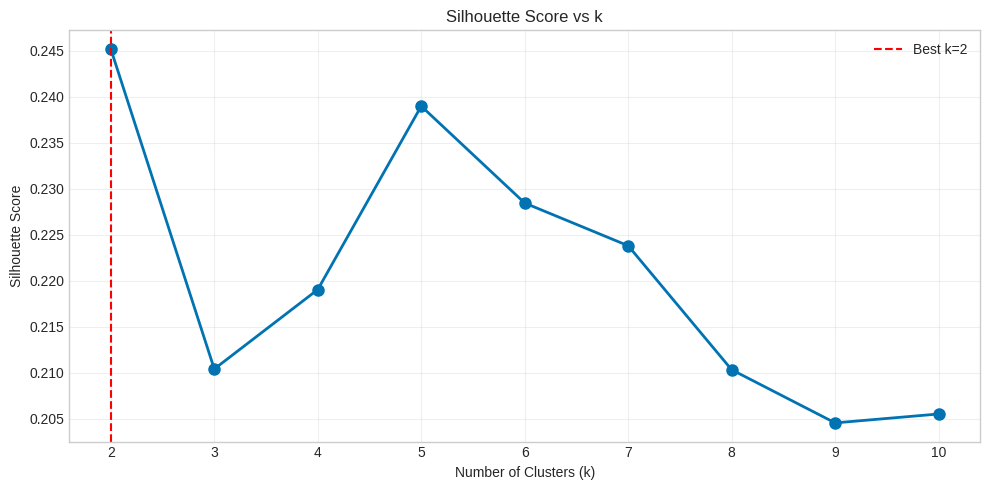

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('silhouette_scores.png', dpi=300)
plt.show()

The Elbow Method clearly indicated k=5 as optimal, with significant
inertia reduction up to this point. But silhouette scores
showed k=2 as the optimal k value. However the scores for k=5 (0.2390) remained close to the k=2 (0.2452), and also much higher than the rest.

Given the business value of more granular customer
segmentation, k=5 was selected to identify distinct customer sub-groups
for targeted marketing strategies.

In [30]:
kmeans = KMeans(n_clusters=5, max_iter=40 , algorithm = 'lloyd')  # using chosen k=5
kmeans.fit(scaled_data)

KMeans(max_iter=40, n_clusters=5)

In [31]:
y_kmeans = kmeans.predict(scaled_data)
print(y_kmeans)

[3 3 4 0 3 2 2 4 0 4 1 0 0 2 3 2 1 0 0 2 4 0 4 4 2 0 0 0 4 4 3 4 2 3 2 2 4
 0 4 3 2 2 3 2 4 2 0 1 1 4 0 4 2 2 2 2 0 4 2 3 2 3 3 2 0 0 3 0 0 1 2 4 4 2
 2 0 3 4 0 4 2 2 4 4 1 0 2 4 0 4 3 0 3 0 4 2 3 4 4 4 0 1 0 1 0 1 2 0 2 1 0
 3 0 0 0 4 3 2 0 4 3 2 2 1 2 4 3 0 3 2 2 3 1 3 4 2 0 0 0 0 0 3 4 4 4 2 4 4
 0 1 1 2 0 0 4 1 3 0 0 3 3 2 0 4 2 0 2 3 2 3 4 4 4 4 1 3 4 2 1 0 3 1 0 1 3
 3 4 2 2 4 2 3 0 1 0 3 0 3 2 3]


/tmp/ipython-input-68130352.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


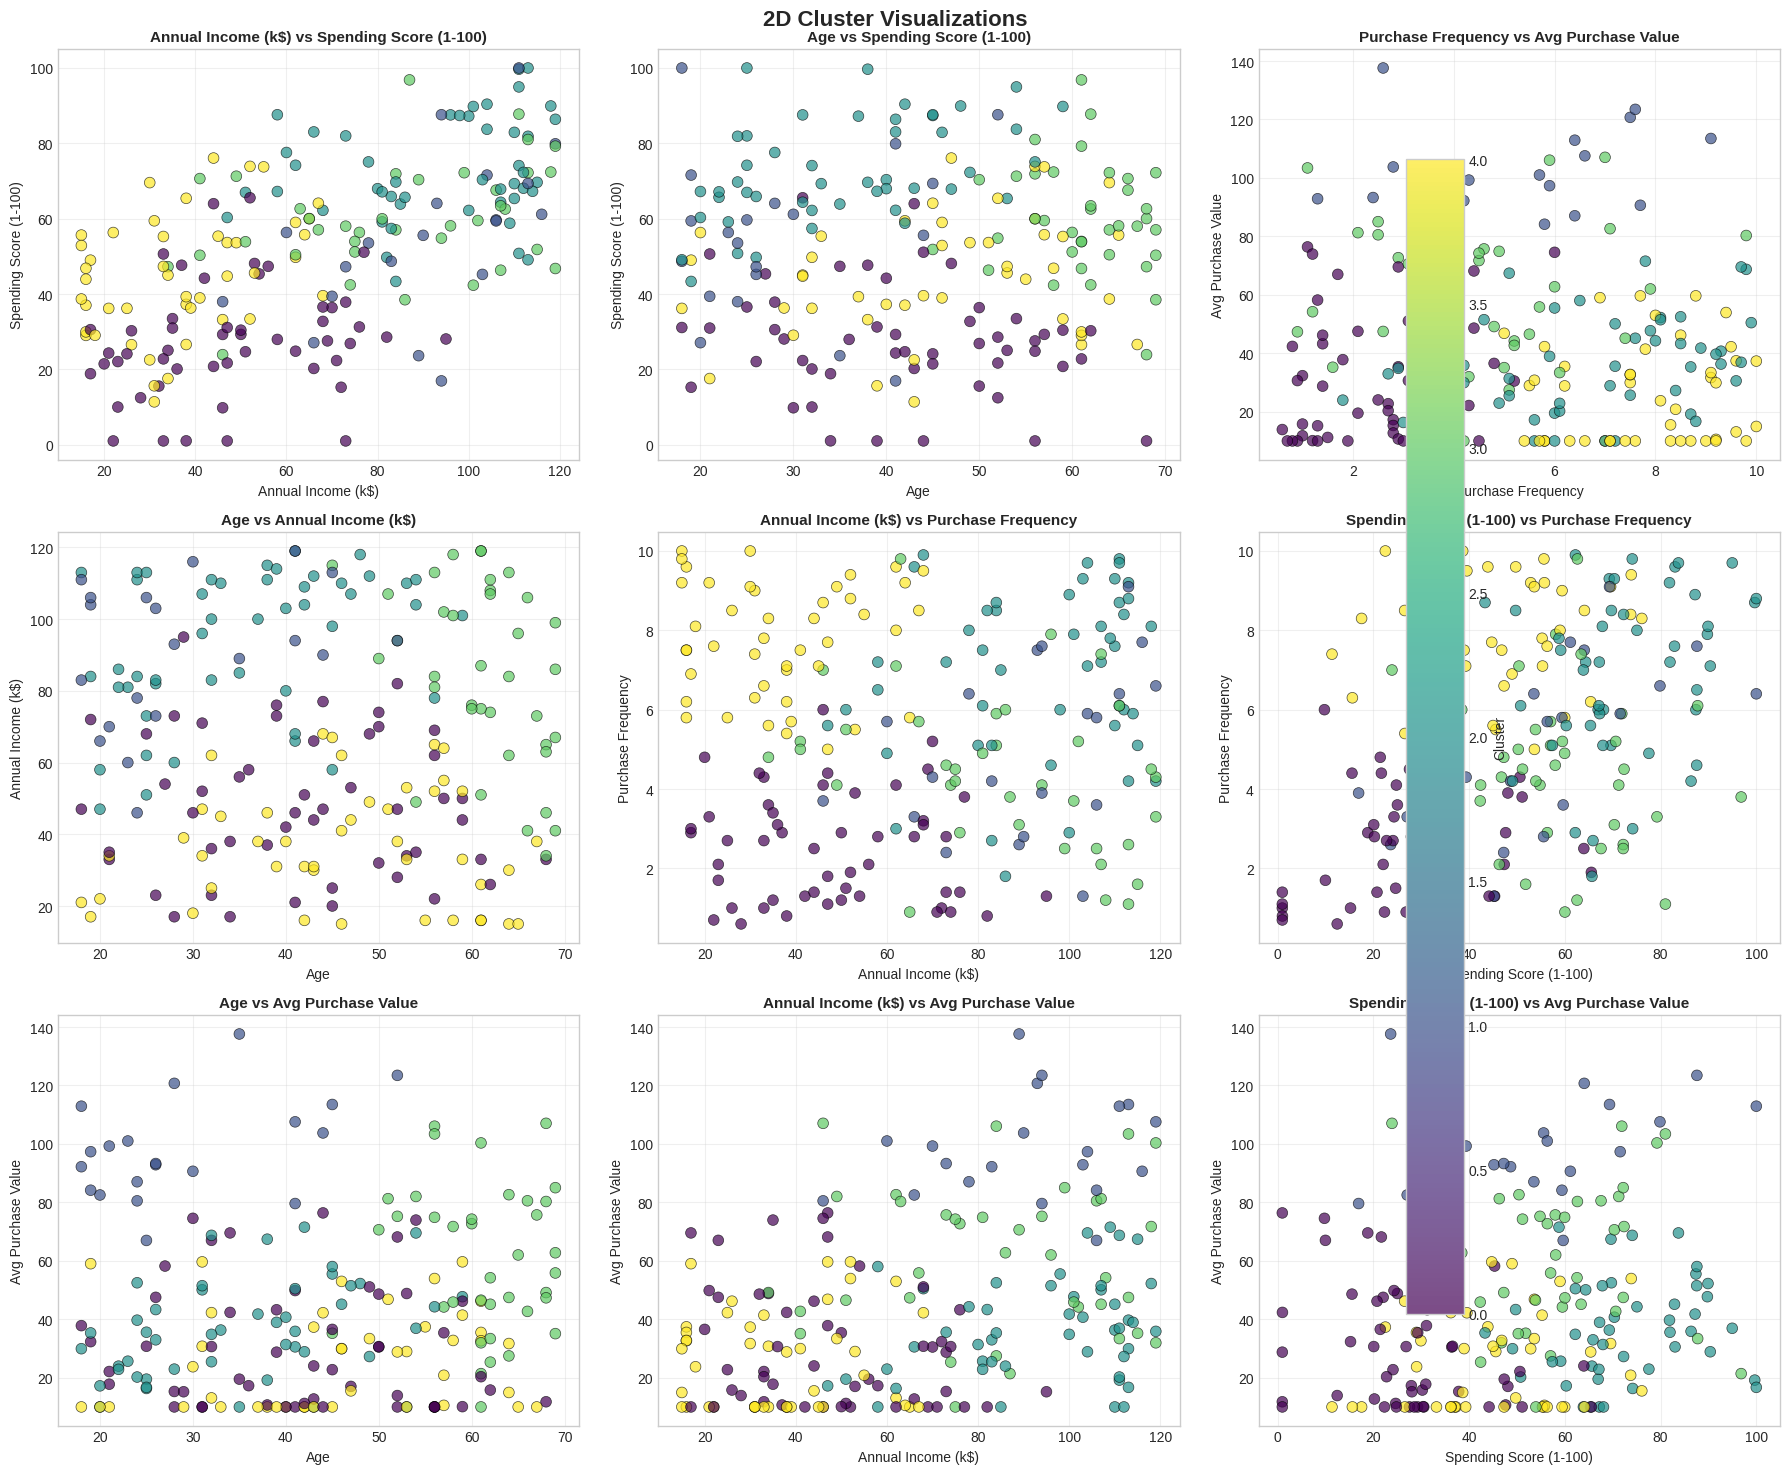

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

feature_pairs = [
    ('Annual Income (k$)', 'Spending Score (1-100)'),
    ('Age', 'Spending Score (1-100)'),
    ('Purchase Frequency', 'Avg Purchase Value'),
    ('Age', 'Annual Income (k$)'),
    ('Annual Income (k$)', 'Purchase Frequency'),
    ('Spending Score (1-100)', 'Purchase Frequency'),
    ('Age', 'Avg Purchase Value'),
    ('Annual Income (k$)', 'Avg Purchase Value'),
    ('Spending Score (1-100)', 'Avg Purchase Value')
]

for idx, (x_feat, y_feat) in enumerate(feature_pairs):
    scatter = axes[idx].scatter(df[x_feat], df[y_feat],
                               c=y_kmeans, cmap='viridis',
                               s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel(x_feat, fontsize=10)
    axes[idx].set_ylabel(y_feat, fontsize=10)
    axes[idx].set_title(f'{x_feat} vs {y_feat}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Cluster')
plt.suptitle('2D Cluster Visualizations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

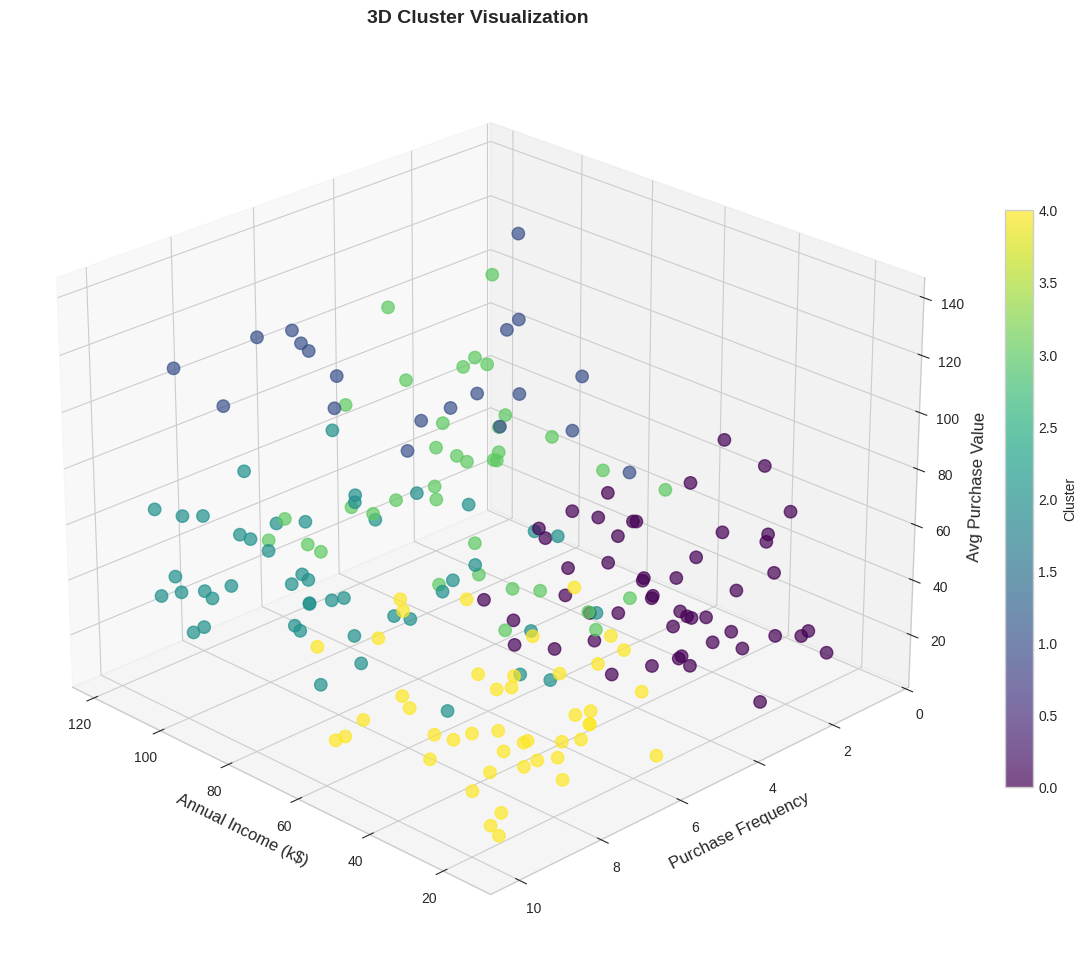

In [34]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Annual Income (k$)'],
                     df['Purchase Frequency'],
                     df['Avg Purchase Value'],
                     c=y_kmeans, cmap='viridis', s=80, alpha=0.7)

ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Purchase Frequency', fontsize=12)
ax.set_zlabel('Avg Purchase Value', fontsize=12)
ax.set_title('3D Cluster Visualization', fontsize=14, fontweight='bold')
ax.view_init(elev=25, azim=135)

plt.colorbar(scatter, label='Cluster', shrink=0.6)
plt.tight_layout()
plt.show()


 This set of graphs uses the value of k=5, the clusters are quite close to each other and some even overlap. While it doesn't create a clear seperation of clusters and statistical perfection, the results are tailored and captures significant groups within the customer base.

 From the graphs, there are 5 clusters that could be interpreted
 1. Lower income customers with frequent low spendings (Yellow)
 2. Lower income customers with infrequent medium spendings (Purple)
 3. Middle income customers with average spendings and frequency, likely representing the average customer (Green)
 4. High income customers who purchase frequently but with low spendings per transactions (Turquoise)
 5. High income customers who purchase less frequently but are high spenders per transaction, likely representing VIP customers (Dark Blue)

 The marketing strategy for this retail business can correctly identify and strategise marketing campaigns for future customers based on the cluster they are categorised into.